# 01 Pandas II: Dates & Plotting

In [1]:
import pandas as pd

# Importing Data

In [3]:
df = pd.read_csv('scraped_and_cleand_six.csv')

# Looking at summary of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 7 columns):
Unnamed: 0     1169 non-null int64
Company        1169 non-null object
Date           1169 non-null object
Price          1169 non-null float64
Share Total    1169 non-null int64
Type           1169 non-null object
Price_m        1169 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 64.0+ KB


[Pandas data types, and Python data types](http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format/)

## Now lets look at the dates

In [9]:
df['Date'].head()

0    30.10.2017
1    30.10.2017
2    30.10.2017
3    30.10.2017
4    27.10.2017
Name: Date, dtype: object

In [10]:
pd.to_datetime(df['Date'], format='%d.%m.%Y')

0      2017-10-30
1      2017-10-30
2      2017-10-30
3      2017-10-30
4      2017-10-27
5      2017-10-27
6      2017-10-27
7      2017-10-27
8      2017-10-27
9      2017-10-27
10     2017-10-26
11     2017-10-26
12     2017-10-26
13     2017-10-25
14     2017-10-25
15     2017-10-25
16     2017-10-25
17     2017-10-25
18     2017-10-24
19     2017-10-24
20     2017-10-23
21     2017-10-20
22     2017-10-20
23     2017-10-18
24     2017-10-17
25     2017-10-17
26     2017-10-16
27     2017-10-16
28     2017-10-16
29     2017-10-13
          ...    
1139   2017-01-12
1140   2017-01-12
1141   2017-01-12
1142   2017-01-12
1143   2017-01-12
1144   2017-01-12
1145   2017-01-12
1146   2017-01-11
1147   2017-01-11
1148   2017-01-11
1149   2017-01-11
1150   2017-01-10
1151   2017-01-10
1152   2017-01-10
1153   2017-01-10
1154   2017-01-09
1155   2017-01-09
1156   2017-01-09
1157   2017-01-09
1158   2017-01-06
1159   2017-01-06
1160   2017-01-06
1161   2017-01-05
1162   2017-01-05
1163   201

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 6 columns):
Company        1169 non-null object
Date           1169 non-null datetime64[ns]
Price          1169 non-null float64
Share Total    1169 non-null int64
Type           1169 non-null object
Price_m        1169 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 54.9+ KB


# Let's plot the transaction counts

[Code overview](http://benalexkeen.com/resampling-time-series-data-with-pandas/)

# First we need to make the date the index

In [18]:
df.index = df['Date']

In [19]:
df.head()

,Company,Date,Price,Share Total,Type,Price_m
Date,,,,,,
2017-10-30,ABB Ltd,2017-10-30,362229.0,14323,Purchase,0.4
2017-10-30,ABB Ltd,2017-10-30,304289.0,12032,Purchase,0.3
2017-10-30,ABB Ltd,2017-10-30,10060.0,500,Purchase,0.0
2017-10-30,ABB Ltd,2017-10-30,10060.0,500,Purchase,0.0
2017-10-27,Banque Cantonale Vaudoise,2017-10-27,10620.0,15,Purchase,0.0


In [232]:
df.resample('W')['Date'].count().head()

Date
2017-01-08    11
2017-01-15    25
2017-01-22    21
2017-01-29    18
2017-02-05    14
Freq: W-SUN, Name: Date, dtype: int64

## Lets plot that

In [20]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

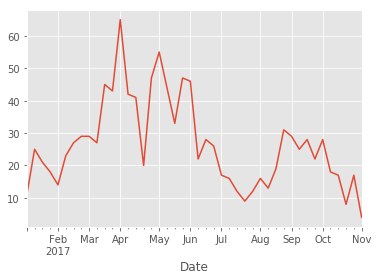

In [21]:
df.resample('W')['Date'].count().plot()

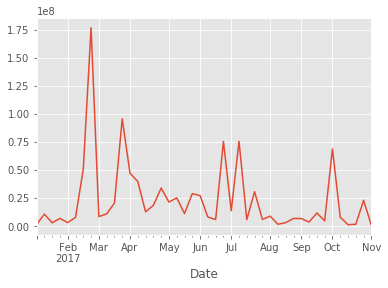

In [24]:
df.resample('W')['Price'].sum().plot()

# Shall we print this out?

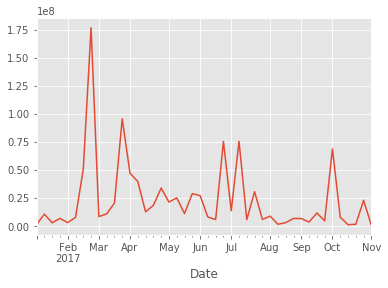

In [25]:
df.resample('W')['Price'].sum().plot()
plt.savefig('hello.pdf')

## But what about different shapes?

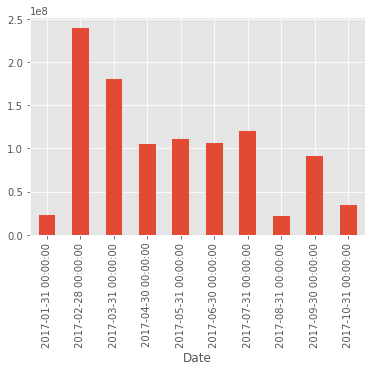

In [26]:
df.resample('M')['Price'].sum().plot(kind='bar')

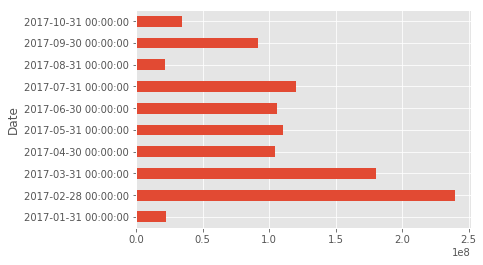

In [27]:
df.resample('M')['Price'].sum().plot(kind='barh')

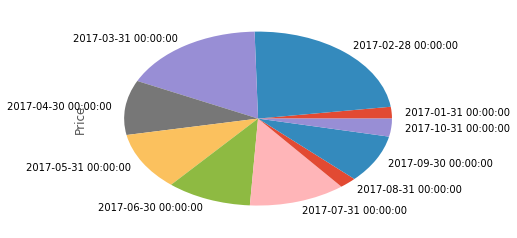

In [28]:
df.resample('M')['Price'].sum().plot(kind='pie')

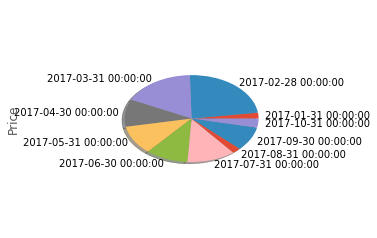

In [29]:
df.resample('M')['Price'].sum().plot(kind='pie', radius=0.5, shadow=True)

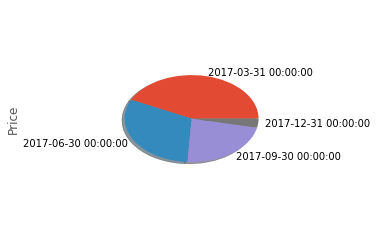

In [30]:
df.resample('Q')['Price'].sum().plot(kind='pie', radius=0.5, shadow=True)

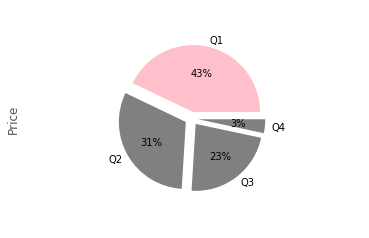

In [36]:
labels = 'Q1', 'Q2', 'Q3', 'Q4'
colors = ['pink', 'grey', 'grey', 'grey']
explode = (0.05, 0.05, 0.05, 0.05)
plt.axis('equal')
df.resample('Q')['Price'].sum().plot(kind='pie', radius=0.5, autopct='%0.0f%%', shadow=False, labels=labels,colors=colors, explode=explode)